<a href="https://colab.research.google.com/github/iGeology-Illinois/geol581-getting-started-with-python-seanb7/blob/main/Python_Base_Stereonet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install mplstereonet
#!pip install panadas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML, YouTubeVideo

print("Welcome to the Structural Geology Stereonet Notebook")

Welcome to the Structural Geology Stereonet Notebook


In [ ]:
# HELPER FUNCTIONS
def plot_planes(planes, title="Planes on Schmidt Net"):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='equal_area')

    for strike, dip in planes:
        ax.plane(strike, dip, linewidth=2)
        pt, pp = mplstereonet.pole(strike, dip)
        ax.pole(strike, dip, 'o', markersize=8)

    ax.grid(True)
    ax.set_title(title)
    plt.show()

def plot_poles(poles, title="Poles on Schmidt Net"):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='equal_area')

    for (trend, plunge) in poles:
        ax.line(trend, plunge, marker='o', markersize=8)

    ax.grid(True)
    ax.set_title(title)
    plt.show()

print("Helper functions defined: plot_planes() and plot_poles()")

Helper functions defined: plot_planes() and plot_poles()


In [1]:
import pandas as pd

df = pd.read_csv('strikes and dips.csv')  # Load CSV into a DataFrame
print(df)  # Display the data

       ID  Strike   Dip              Date    MeasuredBy  \
0    P1-3    43.3  51.0  2025-01-03 23:24   Carlos Diaz   
1    P2-4   133.5  80.0  2025-01-12 17:55    John Smith   
2    P4-1   119.4  87.8  2025-01-16 02:19   Carlos Diaz   
3    P1-7    43.2  49.4  2025-01-10 19:48  Sarah Parker   
4    P1-2    44.2  50.6  2025-01-15 22:05      Mei Chen   
5    P3-9   226.6  41.4  2025-01-13 01:42   Carlos Diaz   
6    P3-6   226.1  38.1  2025-01-14 15:10      Mei Chen   
7    P2-7   136.1  79.3  2025-01-26 22:19      Mei Chen   
8   P1-10    43.1  51.3  2025-01-30 22:38   Carlos Diaz   
9    P2-9   136.8  81.6  2025-01-24 06:09    John Smith   
10  P3-10   226.4  41.6  2025-01-16 20:34   Carlos Diaz   
11   P2-5   133.2  78.3  2025-01-26 16:34   Carlos Diaz   
12   P1-4    45.4  48.4  2025-01-15 08:16  Sarah Parker   
13   P4-2   351.7  82.2  2025-01-08 05:35   Carlos Diaz   
14   P2-8   136.7  79.5  2025-01-04 08:47  Sarah Parker   
15   P3-4   225.0  41.6  2025-01-04 11:29    John Smith 

In [4]:
!pip install mplstereonet
import mplstereonet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplstereonet: filename=mplstereonet-0.6.3-py3-none-any.whl size=38353 sha256=2309df9a157441e02b68747f2424dc0ed2e6d1b363c70154658b2b3d7050393f
  Stored in directory: /root/.cache/pip/wheels/5f/54/7d/ff6afd0bc757fdcfc86bf5d47fa04439797c992120d794df7b
Successfully built mplstereonet


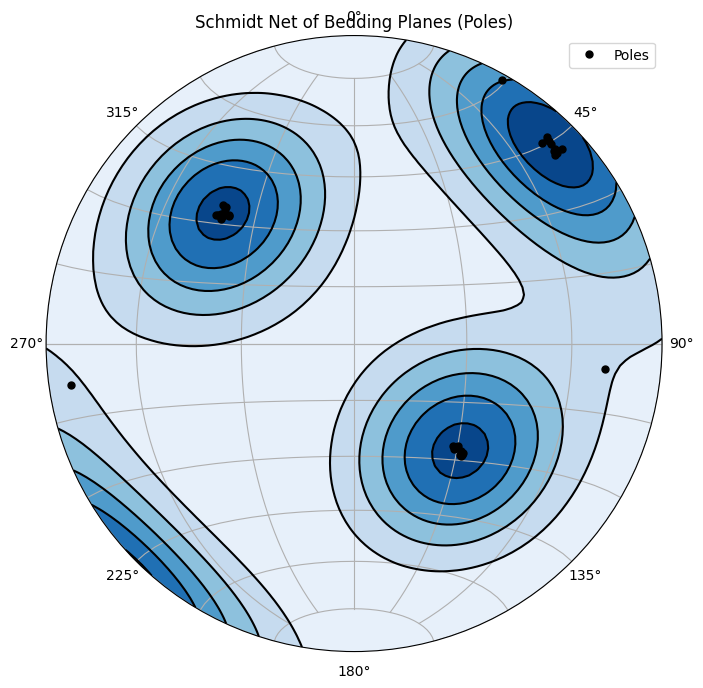

In [6]:
# Extract strike and dip values
strike = df["Strike"].values
dip = df["Dip"].values

# Import the mplstereonet module
import mplstereonet
# Import or re-import matplotlib.pyplot to make 'plt' available
import matplotlib.pyplot as plt

# Create a Schmidt net plot
fig, ax = mplstereonet.subplots(figsize=(8, 8), projection= 'equal_area')

# Convert strike and dip into poles and plot them
ax.pole(strike, dip, 'ko', markersize=5, label="Poles")

# Add density contours to observe clustering
ax.density_contourf(strike, dip, measurement='poles', cmap='Blues')
ax.density_contour(strike, dip, measurement='poles', colors='black')

# Labels and display
ax.grid()
ax.legend()
plt.title("Schmidt Net of Bedding Planes (Poles)") # Now plt is defined
plt.show()

In [7]:
# Drop the outliers
outlier_ids = ["P4-1","P4-2", "P4-3"]  # IDs of detected outliers
cleaned_df = df[~df["ID"].isin(outlier_ids)]

# Display the cleaned DataFrame
print(cleaned_df)

       ID  Strike   Dip              Date    MeasuredBy  \
0    P1-3    43.3  51.0  2025-01-03 23:24   Carlos Diaz   
1    P2-4   133.5  80.0  2025-01-12 17:55    John Smith   
3    P1-7    43.2  49.4  2025-01-10 19:48  Sarah Parker   
4    P1-2    44.2  50.6  2025-01-15 22:05      Mei Chen   
5    P3-9   226.6  41.4  2025-01-13 01:42   Carlos Diaz   
6    P3-6   226.1  38.1  2025-01-14 15:10      Mei Chen   
7    P2-7   136.1  79.3  2025-01-26 22:19      Mei Chen   
8   P1-10    43.1  51.3  2025-01-30 22:38   Carlos Diaz   
9    P2-9   136.8  81.6  2025-01-24 06:09    John Smith   
10  P3-10   226.4  41.6  2025-01-16 20:34   Carlos Diaz   
11   P2-5   133.2  78.3  2025-01-26 16:34   Carlos Diaz   
12   P1-4    45.4  48.4  2025-01-15 08:16  Sarah Parker   
14   P2-8   136.7  79.5  2025-01-04 08:47  Sarah Parker   
15   P3-4   225.0  41.6  2025-01-04 11:29    John Smith   
16   P2-1   136.0  79.8  2025-01-29 14:31    John Smith   
17   P3-5   225.1  40.9  2025-01-27 11:43    John Smith 

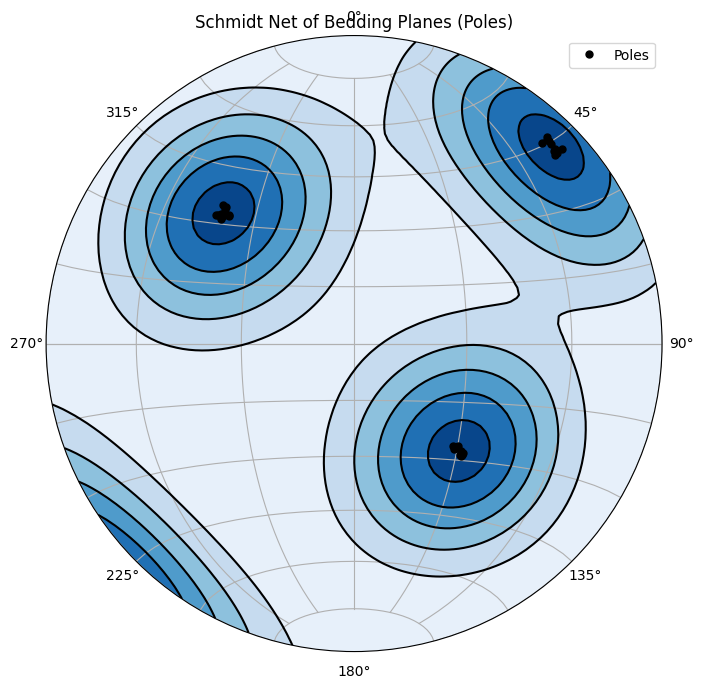

In [8]:
# Extract strike and dip values
strike = cleaned_df["Strike"].values
dip = cleaned_df["Dip"].values

# Create a Schmidt net plot
fig, ax = mplstereonet.subplots(figsize=(8, 8), projection= 'equal_area')

# Convert strike and dip into poles and plot them
ax.pole(strike, dip, 'ko', markersize=5, label="Poles")

# Add density contours to observe clustering
ax.density_contourf(strike, dip, measurement='poles', cmap='Blues')
ax.density_contour(strike, dip, measurement='poles', colors='black')

# Labels and display
ax.grid()
ax.legend()
plt.title("Schmidt Net of Bedding Planes (Poles)")
plt.show()

<ipython-input-10-9011b5345709>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["Cluster"] = kmeans.fit_predict(data)


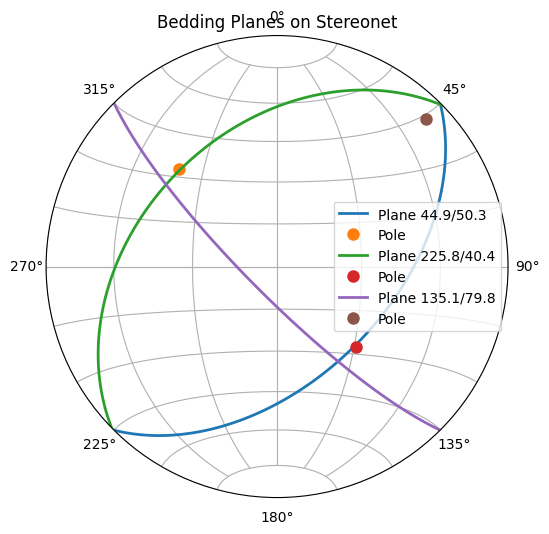

In [10]:
!pip install scikit-learn
import numpy as np
from sklearn.cluster import KMeans

# Prepare data for clustering
data = np.column_stack((cleaned_df["Strike"].values, cleaned_df["Dip"].values))

# Use KMeans clustering to identify 3 bedding plane sets
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cleaned_df["Cluster"] = kmeans.fit_predict(data)

# Compute mean strike and dip for each cluster
bedding_sets = cleaned_df.groupby("Cluster")[["Strike", "Dip"]].mean().reset_index()
planes = list(zip(bedding_sets["Strike"], bedding_sets["Dip"]))

# Convert all strike/dip pairs into poles
poles = [mplstereonet.pole(strike, dip) for strike, dip in zip(cleaned_df["Strike"], cleaned_df["Dip"])]

# Function to plot great circles for bedding planes
def plot_planes(planes, title="Planes on Stereonet"):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='stereonet')

    for strike, dip in planes:
        ax.plane(strike, dip, linewidth=2, label=f"Plane {strike:.1f}/{dip:.1f}")
        pt, pp = mplstereonet.pole(strike, dip)
        ax.pole(strike, dip, 'o', markersize=8, label="Pole")

    ax.grid(True)
    ax.legend()
    ax.set_title(title)
    plt.show()

# Function to plot poles
def plot_poles(poles, title="Poles on Stereonet"):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='stereonet')

    for (trend, plunge) in poles:
        ax.line(trend, plunge, marker='o', markersize=8)

    ax.grid(True)
    ax.set_title(title)
    plt.show()

# Plot the stereonets
plot_planes(planes, title="Bedding Planes on Stereonet")

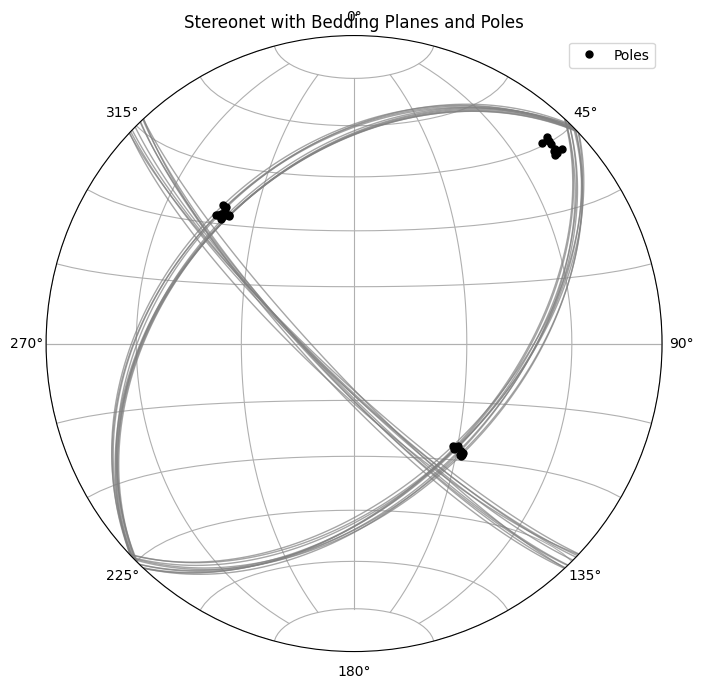

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplstereonet

# Load dataset (replace with your actual file path)
file_path = "strikes and dips.csv"
df = pd.read_csv(file_path)

# Drop the specified outliers
outlier_ids = ["P4-1", "P4-2", "P4-3"]
cleaned_df = df[~df["ID"].isin(outlier_ids)]

# Extract strike and dip values
strike = cleaned_df["Strike"].values
dip = cleaned_df["Dip"].values

# Function to plot all bedding planes (great circles) and poles on a Stereonet
def plot_bedding_planes_and_poles(strike, dip, title="Stereonet with Bedding Planes and Poles"):
    fig, ax = mplstereonet.subplots(figsize=(8, 8))  # Equal-Angle Projection

    # Plot great circles for all bedding planes
    for s, d in zip(strike, dip):
        ax.plane(s, d, linewidth=1, color="gray", alpha=0.7)

    # Plot poles for all bedding planes
    ax.pole(strike, dip, 'ko', markersize=5, label="Poles")

    # Improve plot aesthetics
    ax.grid(True)
    ax.legend()
    ax.set_title(title)

    # Show plot
    plt.show()

# Generate the stereonet with all bedding planes and poles
plot_bedding_planes_and_poles(strike, dip, title="Stereonet with Bedding Planes and Poles")